In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn import set_config
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer

In [3]:
data = pd.read_excel('train.xlsx')
data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
data.shape

(5961, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [6]:
data.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

### Rating

In [7]:
data['Rating']=data['Rating'].str.rstrip('%')
data['Rating']= data['Rating'].astype(float)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       5961 non-null   object 
 1   Experience          5961 non-null   object 
 2   Rating              2659 non-null   float64
 3   Place               5936 non-null   object 
 4   Profile             5961 non-null   object 
 5   Miscellaneous_Info  3341 non-null   object 
 6   Fees                5961 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 326.1+ KB


In [9]:
data['Rating'].fillna(data['Rating'].mean(),inplace=True)

In [10]:
data['Rating']= data['Rating'].astype(int)

In [11]:
data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,94,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,94,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [12]:
data.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [13]:
# drop miscellaneous_info
data.drop(columns=['Miscellaneous_Info'],inplace=True)

### Train test split

In [14]:
# X = data.drop(columns=['Fees'])
# y= data['Fees']

In [15]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [16]:
# X_train.sample(3)

In [17]:
# y_train.sample(3)

In [18]:
# print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

### Profile

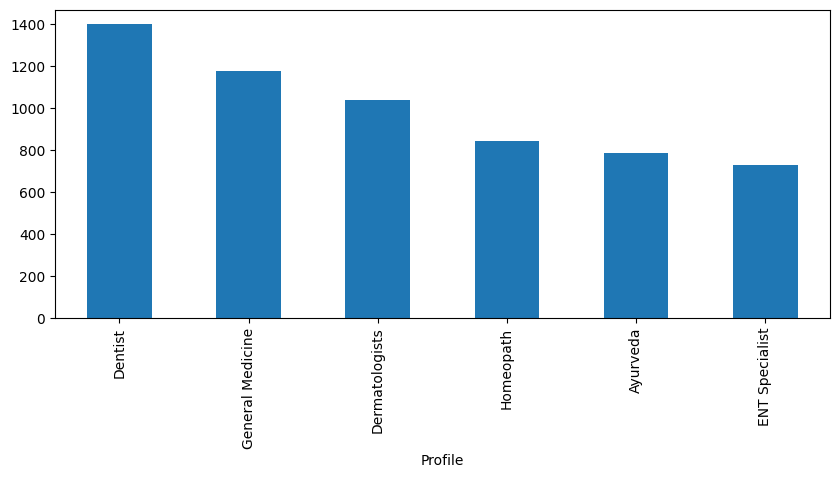

In [19]:
value_counts = data['Profile'].value_counts()
# Plotting a bar graph of value counts
value_counts.plot(kind='bar', figsize=(10, 4))
plt.show()

In [20]:
data.isnull().sum()

Qualification     0
Experience        0
Rating            0
Place            25
Profile           0
Fees              0
dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  5961 non-null   object
 1   Experience     5961 non-null   object
 2   Rating         5961 non-null   int32 
 3   Place          5936 non-null   object
 4   Profile        5961 non-null   object
 5   Fees           5961 non-null   int64 
dtypes: int32(1), int64(1), object(4)
memory usage: 256.3+ KB


### Experience

In [22]:
data['Experience']=data['Experience'].str.split().str[0]
data['Experience']=data['Experience'].astype(int)

In [23]:
data['Experience'].value_counts()

Experience
9     323
10    294
11    288
8     282
12    279
     ... 
60      1
61      1
59      1
65      1
64      1
Name: count, Length: 64, dtype: int64

In [24]:
data.sample(3)

,Qualification,Experience,Rating,Place,Profile,Fees
5292,BHMS,12,94,"Mugalivakkam, Chennai",Homeopath,350
3452,BDS,11,97,"Medavakkam, Chennai",Dentist,200
2335,BAMS,19,94,"Jalahalli, Bangalore",Ayurveda,100


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  5961 non-null   object
 1   Experience     5961 non-null   int32 
 2   Rating         5961 non-null   int32 
 3   Place          5936 non-null   object
 4   Profile        5961 non-null   object
 5   Fees           5961 non-null   int64 
dtypes: int32(2), int64(1), object(3)
memory usage: 233.0+ KB


### Place

In [26]:
data.sample(3)

,Qualification,Experience,Rating,Place,Profile,Fees
5501,BAMS,12,94,"Serilingampally, Hyderabad",Ayurveda,100
1664,"BDS, MDS - Prosthodontics",17,94,"Ramanathapuram, Coimbatore",Dentist,150
2805,"MBBS, DNB, FCCP - Pulmonary Medicine",32,94,"Mallepally, Hyderabad",General Medicine,200


In [27]:
data['City']=data['Place'].str.split(',').str[1]

In [28]:
data.sample(3)

,Qualification,Experience,Rating,Place,Profile,Fees,City
4928,"MS - Otorhinolaryngology, MBBS",5,94,"Ashok Nagar, Chennai",ENT Specialist,300,Chennai
3478,MBBS,51,94,"Valasaravakkam, Chennai",General Medicine,100,Chennai
3324,"MBBS, Diploma in Otorhinolaryngology (DLO), FC...",18,90,"Chembur, Mumbai",ENT Specialist,100,Mumbai


In [29]:
data.drop(columns=['Place'],axis=1,inplace=True)

In [30]:
colns= [' Coimbatore',' Ernakulam',' Thiruvananthapuram',' Sector 5']
data['City']=data['City'].replace(colns,'Others')

In [31]:
data['City']=data['City'].replace('Bangalore',' Bangalore')

In [32]:
data.sample(3)

,Qualification,Experience,Rating,Profile,Fees,City
165,"MBBS, MD - Dermatology",18,96,Dermatologists,500,Bangalore
4368,"MBBS, DVD, FIAMS, MD - Dermatology",22,95,Dermatologists,400,Bangalore
3208,"BHMS, MD - Homeopathy",6,94,Homeopath,300,Chennai


In [33]:
data.isnull().sum()

Qualification     0
Experience        0
Rating            0
Profile           0
Fees              0
City             26
dtype: int64

In [34]:
data.describe(include='object')

,Qualification,Profile,City
count,5961,5961,5935
unique,1420,6,6
top,BDS,Dentist,Bangalore
freq,488,1397,1258


In [35]:
data['City']=data['City'].fillna('Bangalore')

In [36]:
data.isnull().sum()

Qualification    0
Experience       0
Rating           0
Profile          0
Fees             0
City             0
dtype: int64

In [37]:
data.sample(5)

,Qualification,Experience,Rating,Profile,Fees,City
2891,"MBBS, MD - Dermatology , Venereology & Leprosy",12,93,Dermatologists,300,Hyderabad
375,"BAMS, Post Graduate Diploma In Yoga",37,94,Ayurveda,100,Delhi
1861,MBBS,26,94,General Medicine,100,Chennai
60,"MBBS, MD - Dermatology , Venereology & Leprosy",8,94,General Medicine,500,Chennai
2824,"DNB - Orthopedics/Orthopedic Surgery, MBBS",13,94,General Medicine,400,Mumbai


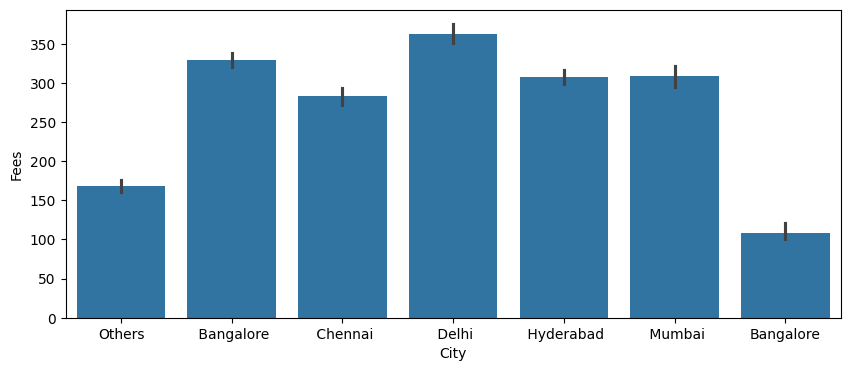

In [38]:
plt.figure(figsize=(10,4))
sns.barplot(x='City',y='Fees',data = data)
plt.show()

### Qualification

In [39]:
data['Qualification'].value_counts()

Qualification
BDS                                                                                                                           488
BHMS                                                                                                                          477
BAMS                                                                                                                          471
MBBS                                                                                                                          334
MBBS, MS - ENT                                                                                                                220
                                                                                                                             ... 
MBBS, F.C.I.P                                                                                                                   1
BAMS, PG Diploma in Panchakarma                                             

In [40]:
data['Qualification_count']= data['Qualification'].apply(lambda x: len(x.split(',')))

<Axes: xlabel='Qualification_count'>

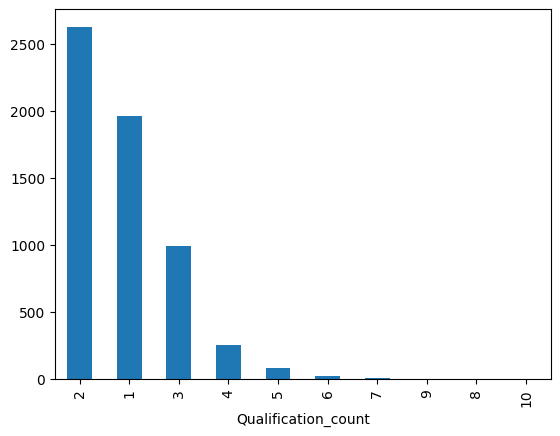

In [41]:
data['Qualification_count'].value_counts().plot(kind='bar')

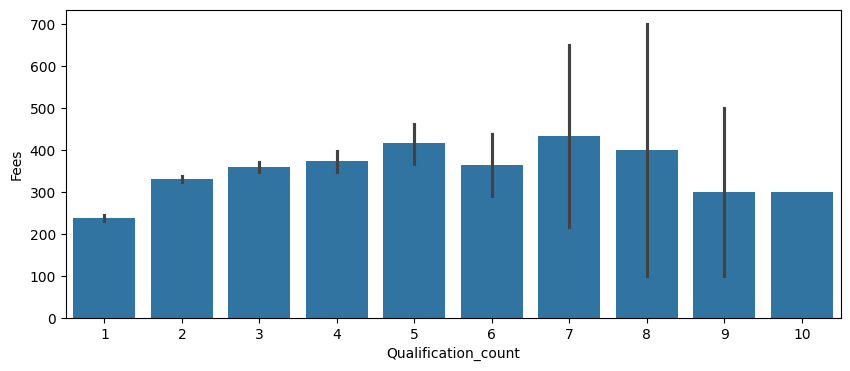

In [42]:
plt.figure(figsize=(10,4))
sns.barplot(x='Qualification_count',y='Fees',data = data)
plt.show()

In [43]:
data.head()

,Qualification,Experience,Rating,Profile,Fees,City,Qualification_count
0,"BHMS, MD - Homeopathy",24,100,Homeopath,100,Others,2
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,350,Bangalore,2
2,"MBBS, MS - Otorhinolaryngology",9,94,ENT Specialist,300,Bangalore,2
3,"BSc - Zoology, BAMS",12,94,Ayurveda,250,Bangalore,2
4,BAMS,20,100,Ayurveda,250,Chennai,1


In [44]:
data.drop(columns=['Qualification'],axis=1,inplace=True)

In [45]:
data.head()

,Experience,Rating,Profile,Fees,City,Qualification_count
0,24,100,Homeopath,100,Others,2
1,12,98,Ayurveda,350,Bangalore,2
2,9,94,ENT Specialist,300,Bangalore,2
3,12,94,Ayurveda,250,Bangalore,2
4,20,100,Ayurveda,250,Chennai,1


In [46]:
data.head()

,Experience,Rating,Profile,Fees,City,Qualification_count
0,24,100,Homeopath,100,Others,2
1,12,98,Ayurveda,350,Bangalore,2
2,9,94,ENT Specialist,300,Bangalore,2
3,12,94,Ayurveda,250,Bangalore,2
4,20,100,Ayurveda,250,Chennai,1


## Train test split

In [47]:
X= data.drop(columns=['Fees'])
y= data['Fees']

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [49]:
X_train.head(3)

,Experience,Rating,Profile,City,Qualification_count
2377,14,94,Ayurveda,Bangalore,1
1745,16,94,General Medicine,Bangalore,2
2327,49,94,General Medicine,Others,2


In [50]:
y_train.head(3)

2377    100
1745    250
2327    300
Name: Fees, dtype: int64

In [51]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4768, 5) (1193, 5) (4768,) (1193,)


## Creating pipeline

In [52]:
#Creating the first transformer for my pipeline
trf1= ColumnTransformer([
    ('ohe_profile',OneHotEncoder(sparse_output=False,drop='first'),[2,3])
],remainder='passthrough')

In [55]:
X_train.head()

,Experience,Rating,Profile,City,Qualification_count
2377,14,94,Ayurveda,Bangalore,1
1745,16,94,General Medicine,Bangalore,2
2327,49,94,General Medicine,Others,2
3783,23,76,General Medicine,Delhi,2
2740,28,95,General Medicine,Delhi,2


In [ ]:
#Creating the second transformer for my pipeline
trf2 = ColumnTransformer([
    ('scaler',MinMaxScaler(),slice(0,14))
],remainder='passthrough')

In [ ]:
trf3= LinearRegression()

In [ ]:
set_config(display='diagram')

In [ ]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_profile',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [2, 3])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  slice(0, 14, None))])),
                ('trf3', LinearRegression())])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
y_pred

array([376.24569738, 414.95800406, 328.52797009, ..., 342.55141679,
       244.06674407, 278.69266844])

In [ ]:
y_test

5049    350
3593    300
2926    400
168     100
3052    200
       ... 
3642    200
1831    380
1656    600
53      100
1438    200
Name: Fees, Length: 1193, dtype: int64

In [ ]:
X_train_transformed = trf1.fit_transform(X_train)

In [ ]:
X_train.head()

,Experience,Rating,Profile,City,Qualification_count
2377,14,94,Ayurveda,Bangalore,1
1745,16,94,General Medicine,Bangalore,2
2327,49,94,General Medicine,Others,2
3783,23,76,General Medicine,Delhi,2
2740,28,95,General Medicine,Delhi,2


In [ ]:
pd.DataFrame(X_train_transformed).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,94.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,94.0,2.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,49.0,94.0,2.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,23.0,76.0,2.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,28.0,95.0,2.0


In [ ]:
x2= trf2.fit_transform(X_train_transformed)

In [ ]:
pd.DataFrame(x2).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.212121,0.910448,0.000
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.242424,0.910448,0.125
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.742424,0.910448,0.125
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.348485,0.641791,0.125
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.424242,0.925373,0.125


In [ ]:
import pickle

In [ ]:
pickle.dump(pipe,open('pipe.pkl','wb'))